In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Step 1 : Smooth
## Step 2: Peaks

In [101]:
df_full = pandas.read_excel('../data/GTD_0616dist/gtd_12to15_0616dist.xlsx')
print len(df_full)
df_full['datetime'] = pandas.to_datetime((df_full.iyear*10000+df_full.imonth*100+df_full.iday).apply(str),format='%Y%m%d')
print len(df_full)

52134
52134


In [102]:
df_2015 = df_full[df_full.iyear == 2015] 
print len(df_2015)

14806


## Look at count of incidents by day

In [119]:
COUNTRY = 'United Kingdom'

In [120]:
df = df_full[df_full.country_txt == COUNTRY] 
print len(df)
print df.datetime.min()

406
2012-01-05 00:00:00


In [121]:
nkill = df.groupby('datetime').nkill.sum()
print len(nkill)
counts = df.groupby('datetime').eventid.count()
print len(counts)

319
319


In [122]:
df.datetime.max()

Timestamp('2015-12-17 00:00:00')

In [123]:
df = pandas.concat([nkill, counts], axis=1)
df.columns = ['deaths', 'incidents']

In [124]:
df.head()

,deaths,incidents
datetime,,
2012-01-05,0.0,1
2012-01-19,0.0,2
2012-03-04,0.0,1
2012-03-09,0.0,2
2012-03-12,0.0,1


In [125]:
# Fill missing dates
idx = pandas.date_range('01-01-2012', '12-31-2015') # Resample fill in missing dates
df = df.reindex(idx, fill_value=0) 

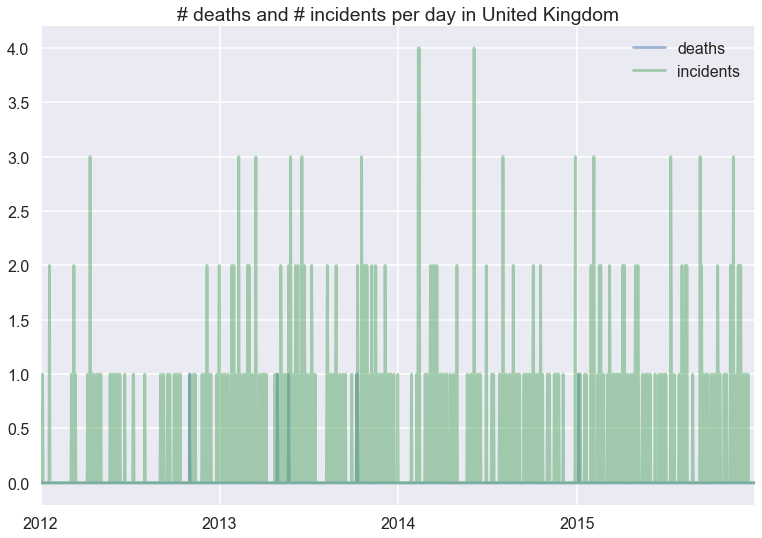

In [127]:
df.plot(alpha=0.5)
plt.title("# deaths and # incidents per day in " + COUNTRY)